# Lecture 7: Data management and diagnosis
## October 29, 2019
## Tristan Glatard

# Learning Objectives

1. Data loading and visualization (pandas, matplotlib, **1 hour**)
2. Correlation analysis (pandas + seaborn, **1 hour**)
3. Building and evaluating predictive data models (linear regression: numpy, scikit-learn, **1 hour**)

# Goal of the session

In this lecture we will use the "Boston house prices" dataset from scikit learn (see description [here](https://scikit-learn.org/stable/datasets/index.html)).

Our goal is to **build a linear regression model to predict median property prices in a neighborhood**.

The median property price is called the *target variable*. Other variables are called *features*.

# 1. Data Loading

First, let's load the dataset using `sklearn`:

In [1]:
import sklearn.datasets
boston_data = sklearn.datasets.load_boston()

And let's check the type and attributes of the returned object:

In [2]:
dir(boston_data)

['DESCR', 'data', 'feature_names', 'filename', 'target']

DESC contains a description of the dataset:

In [3]:
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

`data` is a `numpy` array containing the data (13 features, 506 data points)

In [4]:
type(boston_data.data)

numpy.ndarray

In [5]:
from numpy import shape
shape(boston_data.data)

(506, 13)

`feature_names` contain the column names of the dataset

In [6]:
print(boston_data.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


Finally, `target` is a numpy array containing the variable to be predicted, in our case MEDV, the median value of homes in the neighborhood:

In [7]:
type(boston_data.target)

numpy.ndarray

In [10]:
boston_data.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

## Loading in Pandas

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Antu_task-complete.svg/1024px-Antu_task-complete.svg.png" width=50 align=left/>

* Using constructor `pd.Dataframe` (see documentation [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame)), load this dataset as a Pandas Dataframe

In [15]:
import pandas as pd
df = pd.DataFrame(data=boston_data.data, columns=(boston_data.feature_names))
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Summary statistics

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Antu_task-complete.svg/1024px-Antu_task-complete.svg.png" width=50 align=left/>

* Using pandas, print summary statistics about the dataset. 

* Are all features present? Is the target present? If not, add it as a new column of the DataFrame.

In [29]:
df['Price'] = boston_data.target
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Histograms
Matplotlib's `hist` function can plot the histogram of a dataset. For instance:



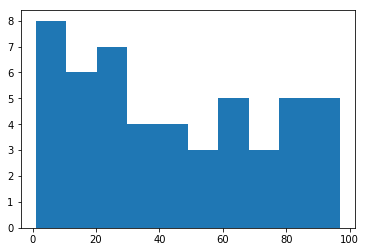

In [27]:
from numpy.random import randint
numbers = randint(1, 100, 50)  # This generates 50 random integers between 1 and 100

import matplotlib.pyplot as plt
plt.hist(numbers)
plt.show()

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Antu_task-complete.svg/1024px-Antu_task-complete.svg.png" width=50 align=left/>

Using `matplotlib`'s `hist` function, plot a histogram of median prices in the dataset.

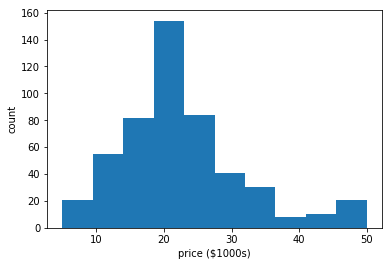

In [31]:
plt.hist(df['Price'])
plt.xlabel('price ($1000s)')
plt.ylabel('count')
plt.show()

# 2. Correlation analysis

Here we will identify the parameters that are linearly correlated to the target variable. First, we will do so through visualization. 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Antu_task-complete.svg/1024px-Antu_task-complete.svg.png" width=50 align=left/>

* Using `matplotlib`, plot 13 scatter plots showing the Median property price as a function of each of the 13 features in the dataset. Which feature(s) are the most correlated to the target?

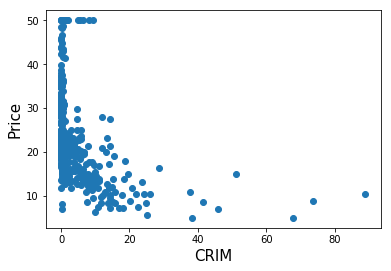

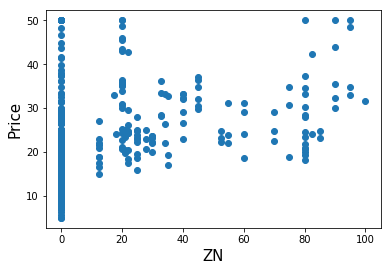

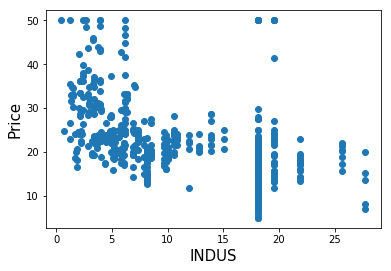

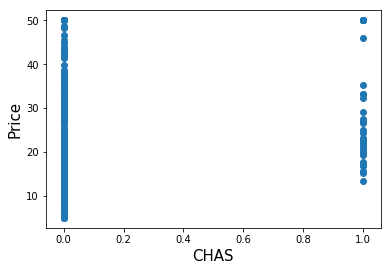

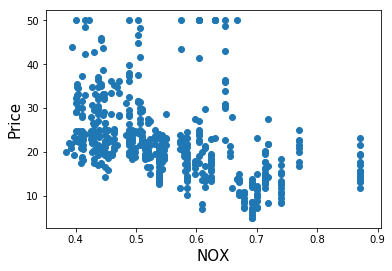

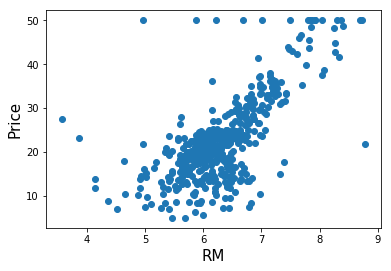

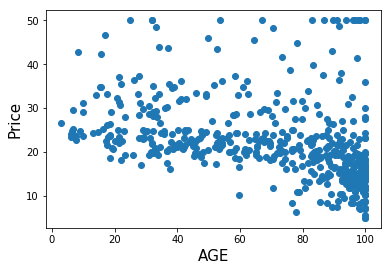

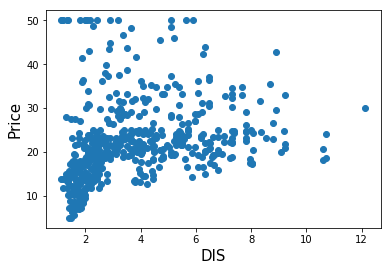

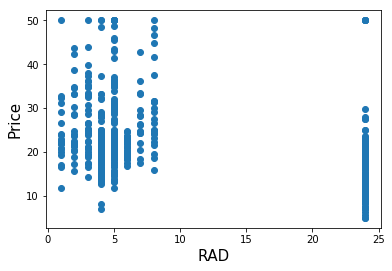

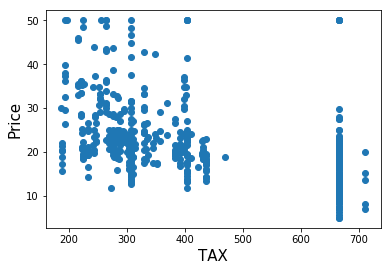

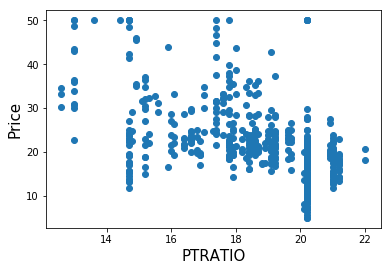

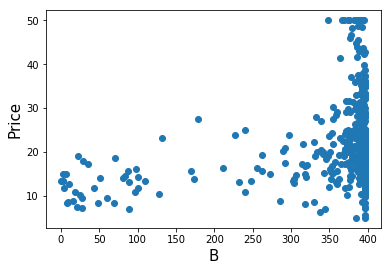

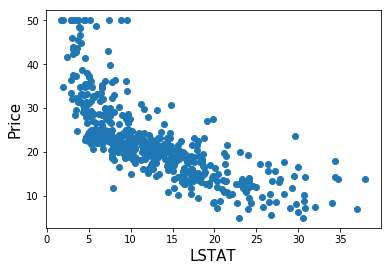

In [36]:
for feature_name in boston_data.feature_names:
    plt.scatter(df[feature_name], boston_data.target)
    plt.ylabel('Price', size=15)
    plt.xlabel(feature_name, size=15)
    plt.savefig(feature_name+".png")
    plt.show()

A more objective way to measure linear correlation is to use Pearson's correlation coefficient.

The `corr` function in Panda's DataFrame (see documentation [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)) computes Pearson's correlation coefficient between all columns of a DataFrame. 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Antu_task-complete.svg/1024px-Antu_task-complete.svg.png" width=50 align=left/>

* Using this function, compute the correlation between the columns of the DataFrame. Which feature(s) is(are) the most correlated to the target?



In [38]:
df['Price'] = boston_data.target
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


The `seaborn` library (documentation [here](https://seaborn.pydata.org/)), available on PyPi, has a `heatmap` function to visualize Pandas DataFrames. 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Antu_task-complete.svg/1024px-Antu_task-complete.svg.png" width=50 align=left/>

* Use this library to visualize a heatmap of the previous DataFrame.

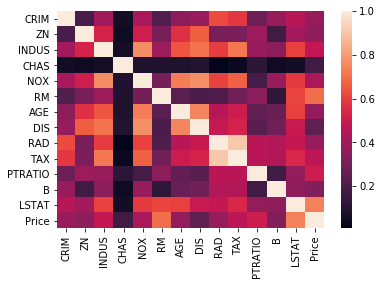

In [42]:
corr = df.corr()
import seaborn as sns
sns.heatmap(corr.abs())
plt.show()


Note: `seaborn` also has a useful `jointplot` function to plot joint distributions:

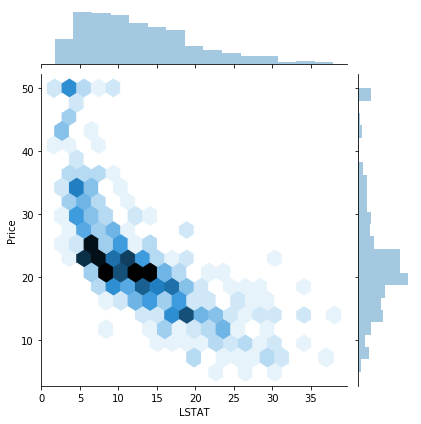

In [45]:
sns.jointplot(df['LSTAT'], df['Price'], kind='hex')
plt.show()

# 3. More data models

## Linear regression

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Antu_task-complete.svg/1024px-Antu_task-complete.svg.png" width=50 align=left/>

* Using `numpy`'s `polyfit` (see Lecture 6), fit a straight line to the feature with the highest linear correlation with the average house price.

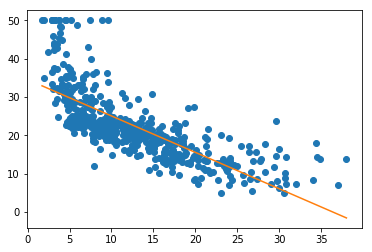

In [47]:
from numpy import polyfit, polyval
lstat = df['LSTAT']
prices = df['Price']
p = polyfit(lstat, prices, 1)
plt.plot(lstat, prices, 'o')
plt.plot(sorted(lstat), polyval(p, sorted(lstat)), '-')
plt.show()

## Model evaluation

To evaluate data models, it is important to separate the data set into training and testing sets:
* The model is **built** exclusively from the **training** set
* The model is **evaluated** exclusively from the **testing** set

`scikit-learn` can help us split our dataset into training and testing sets:

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['LSTAT'], boston_data.target)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Antu_task-complete.svg/1024px-Antu_task-complete.svg.png" width=50 align=left/>

1. Fit a linear model to the **training** set
2. Write a function called `price_prediction` that predicts the target variable from feature `LSTAT`
3. Create an array called `predictions` containing the prices predicted from variable `LSTAT` in the **testing** set

In [49]:
from numpy import polyfit

p = polyfit(X_train, y_train, 1)
def price_prediction(lstat):
    return polyval(p, lstat)
predictions = price_prediction(X_test)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Antu_task-complete.svg/1024px-Antu_task-complete.svg.png" width=50 align=left/>

* Create a scatter plot comparing your predicted values to the true values.

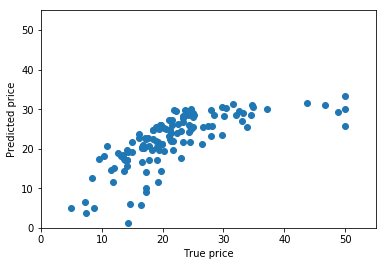

In [50]:
plt.plot(y_test, predictions, 'o')
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.xlim(0, 55)
plt.ylim(0, 55)
plt.show()

Models are often evaluated using the mean squared error between the predicted values and the expected (true) ones. The mean squared error is given by the following formula:
$$
M = \frac{\sum^n_{i=1}(P_i - T_i)^2}{n}
$$
where $P_i$ are the predicted values, and $T_i$ are the true values.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Antu_task-complete.svg/1024px-Antu_task-complete.svg.png" width=50 align=left/>

* Compute the mean squared error of your predictions

In [51]:
sum((predictions-y_test)**2)/len(X_test)

38.95805999997073

## Bonus: linear regression with scikit-learn

The code below performs a linear regression using scikit-learn, measures the mean squared error, and plot the predictions.

37.05839875439939


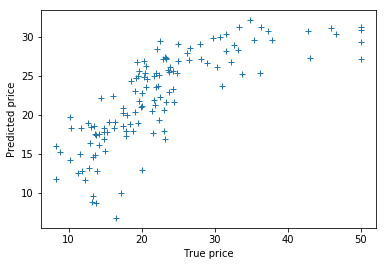

In [84]:
# Define model
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

# Fit model to training data
clf.fit(X_train.values.reshape(-1, 1), y_train)

# Compute predictions
predicted = clf.predict(X_test.values.reshape(-1, 1))
expected = y_test

# Print mean-squared error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(predicted, expected))

# Plot predictions
plt.plot(expected, predicted, '+')
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.show()

scikit-learn can also do linear regressions from multiple features. From your study of the example above, create a linear regresssion model using the 13 features of the dataset. What is the value of the mean squared error of your predictions?

18.910438407836


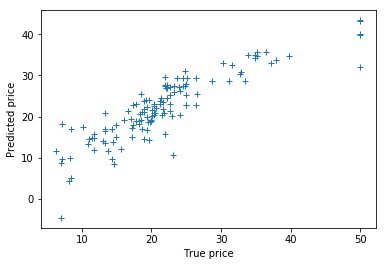

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(boston_data.data, boston_data.target)
clf = LinearRegression()

clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
expected = y_test

from sklearn.metrics import mean_squared_error
print(mean_squared_error(predicted, expected))
plt.plot(expected, predicted, '+')
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.show()
